# Time Analysis prediction 

using the regrssion techniques can you predict the future of the stock market based on the history of it ?

![Time analysis](https://magoosh.com/statistics/files/2018/05/time_series.png)

it would be great to predict one day in the future, one month and one year !

In [2]:
# libs
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from fbprophet import Prophet
%matplotlib inline

import sklearn
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.externals import joblib
from sklearn.model_selection import GridSearchCV, train_test_split

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [3]:
# pip install fbprophet

In [4]:
print('Python version:{}'.format(sys.version))
print('Numpy version:{}'.format(np.__version__))
print('Pandas version:{}'.format(pd.__version__))
# print('MatlpotLib version:{}'.format(matplotlib.__version__))
# print('Seaborn version:{}'.format(sns.__version__))
# print('Sci-Kit Learn version:{}'.format(sklearn.__version__))
# print('XGBoost version:{}'.format(xgboost.__version__))

Python version:3.7.4 (default, Aug  9 2019, 18:22:51) [MSC v.1915 32 bit (Intel)]
Numpy version:1.16.5
Pandas version:0.25.1


## Data Visualization


In [26]:
df = pd.read_csv('EURUSD_15m_BID_01.01.2010-31.12.2016.csv')
df.head()

,Time,Open,High,Low,Close,Volume
0,2010-01-01 00:00,1.43283,1.43293,1.43224,1.43293,608600007.1
1,2010-01-01 00:15,1.43285,1.43295,1.43229,1.43275,535600003.2
2,2010-01-01 00:30,1.43280,1.43303,1.43239,1.43281,436299999.2
3,2010-01-01 00:45,1.43285,1.43294,1.43229,1.43276,614299997.3
4,2010-01-01 01:00,1.43287,1.43292,1.43206,1.43282,705300008.8


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245444 entries, 0 to 245443
Data columns (total 6 columns):
Time      245444 non-null object
Open      245444 non-null float64
High      245444 non-null float64
Low       245444 non-null float64
Close     245444 non-null float64
Volume    245444 non-null float64
dtypes: float64(5), object(1)
memory usage: 10.3+ MB


In [7]:
df.describe()

,Open,High,Low,Close,Volume
count,245444.000000,245444.000000,245444.000000,245444.000000,2.454440e+05
mean,1.268372,1.268738,1.268003,1.268371,1.624311e+09
std,0.112994,0.113017,0.112965,0.112994,2.320694e+09
min,1.035580,1.036280,1.035230,1.035600,0.000000e+00
25%,1.135350,1.135660,1.134870,1.135348,0.000000e+00
50%,1.302350,1.302740,1.302100,1.302350,9.801100e+08
75%,1.356560,1.356980,1.356082,1.356552,2.316977e+09
max,1.493230,1.493980,1.491850,1.493240,3.779797e+10


In [34]:
df.shape

(245444, 6)

No handles with labels found to put in legend.
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


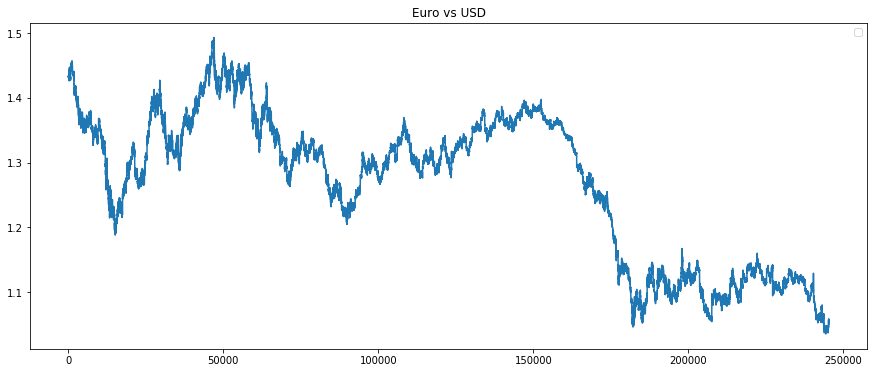

In [35]:
plt.figure(figsize=(15,6))
plt.plot(df.Close)
plt.title('Euro vs USD')
plt.legend()
plt.show()

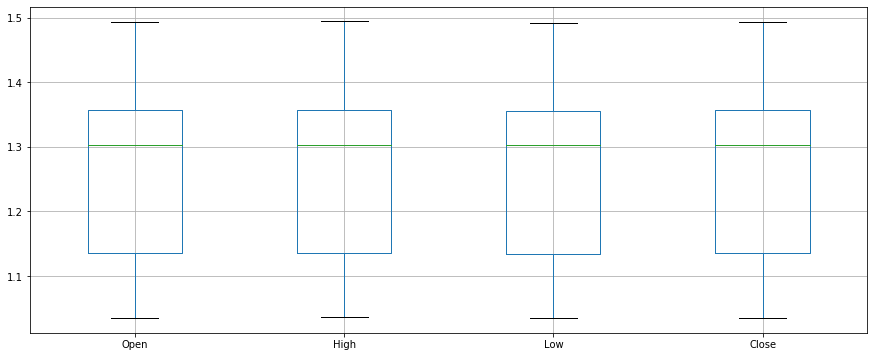

In [36]:
plt.figure(figsize=(15,6))
df.drop('Volume',axis = 'columns').boxplot()
plt.show()

## Data Preprocessing

In [37]:
df.isna().sum()

Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

no null values and all cloumns numrical except time column

In [38]:
corr = df.corr()
corr

,Open,High,Low,Close,Volume
Open,1.000000,0.999987,0.999987,0.999983,-0.175172
High,0.999987,1.000000,0.999973,0.999989,-0.173501
Low,0.999987,0.999973,1.000000,0.999988,-0.176775
Close,0.999983,0.999989,0.999988,1.000000,-0.175165
Volume,-0.175172,-0.173501,-0.176775,-0.175165,1.000000


as we see we dont need volume coulmn in our data 

In [39]:
df.drop('Volume' , 1 , inplace=True)
df.head()

,Time,Open,High,Low,Close
0,2010-01-01 00:00,1.43283,1.43293,1.43224,1.43293
1,2010-01-01 00:15,1.43285,1.43295,1.43229,1.43275
2,2010-01-01 00:30,1.43280,1.43303,1.43239,1.43281
3,2010-01-01 00:45,1.43285,1.43294,1.43229,1.43276
4,2010-01-01 01:00,1.43287,1.43292,1.43206,1.43282


- we learn from time cloumn that every 1 hour there 4 transaction and in future predction we dont need this columns
- from visualizing the data we see we dont need to scaling it
- we use last 50000 data raws to learn from it to predict future

## Training and Fitting data

In [40]:
# x = df.tail(50000).iloc[:,1:-1]
# x.head()

,Open,High,Low
195444,1.10818,1.10825,1.10782
195445,1.10797,1.10816,1.10791
195446,1.10815,1.10828,1.10795
195447,1.10825,1.10825,1.10785
195448,1.10798,1.10798,1.10724


In [41]:
# y = df.tail(50000).iloc[:,-1]
# y.head()

195444    1.10797
195445    1.10814
195446    1.10824
195447    1.10798
195448    1.10724
Name: Close, dtype: float64

In [42]:
# from sklearn.model_selection import train_test_split
# x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 ,random_state=0)

## Generate Function ! (under update)

In [45]:
def generate_features(df1):
    """ Generate features for a stock/index/currency/commodity based on historical price and performance
    Args:
        df (dataframe with columns "open", "close", "high", "low", "volume")
    Returns:
        dataframe, data set with new features
    """
    df_new = pd.DataFrame()
    
    # 6 original features
    df_new['open'] = df1['Open']
    df_new['open_1'] = df1['Open'].shift(1)
    df_new['close_1'] = df1['Close'].shift(1)
    df_new['high_1'] = df1['High'].shift(1)
    df_new['low_1'] = df1['Low'].shift(1)
    
     # 50 original features
    # average price
    df_new['avg_price_5'] = df['Close'].rolling(window=5).mean().shift(1)
    df_new['avg_price_30'] = df['Close'].rolling(window=21).mean().shift(1)
    df_new['avg_price_90'] = df['Close'].rolling(window=63).mean().shift(1)
    df_new['avg_price_365'] = df['Close'].rolling(window=252).mean().shift(1)
    
        # average price ratio
    df_new['ratio_avg_price_5_30'] = df_new['avg_price_5'] / df_new['avg_price_30']
    df_new['ratio_avg_price_905_'] = df_new['avg_price_5'] / df_new['avg_price_90']
    df_new['ratio_avg_price_5_365'] = df_new['avg_price_5'] / df_new['avg_price_365']
    df_new['ratio_avg_price_30_90'] = df_new['avg_price_30'] / df_new['avg_price_90']
    df_new['ratio_avg_price_30_365'] = df_new['avg_price_30'] / df_new['avg_price_365']
    df_new['ratio_avg_price_90_365'] = df_new['avg_price_90'] / df_new['avg_price_365'] 
    
                                                    
    # standard deviation of prices
    df_new['std_price_5'] = df1['Close'].rolling(window=5).std().shift(1)
    df_new['std_price_30'] = df1['Close'].rolling(window=21).std().shift(1)
    df_new['std_price_90'] = df1['Close'].rolling(window=63).std().shift(1)                                               
    df_new['std_price_365'] = df1['Close'].rolling(window=252).std().shift(1)
    
    # standard deviation ratio of prices 
    df_new['ratio_std_price_5_30'] = df_new['std_price_5'] / df_new['std_price_30']
    df_new['ratio_std_price_5_90'] = df_new['std_price_5'] / df_new['std_price_90']
    df_new['ratio_std_price_5_365'] = df_new['std_price_5'] / df_new['std_price_365']
    df_new['ratio_std_price_30_90'] = df_new['std_price_30'] / df_new['std_price_90'] 
    df_new['ratio_std_price_30_365'] = df_new['std_price_30'] / df_new['std_price_365']                                               
    df_new['ratio_std_price_90_365'] = df_new['std_price_90'] / df_new['std_price_365']                                                
    
      # return
    df_new['return_1'] = ((df1['Close'] - df1['Close'].shift(1)) / df1['Close'].shift(1)).shift(1)
    df_new['return_5'] = ((df1['Close'] - df1['Close'].shift(5)) / df1['Close'].shift(5)).shift(1)
    df_new['return_30'] = ((df1['Close'] - df1['Close'].shift(21)) / df1['Close'].shift(21)).shift(1)
    df_new['return_90'] = ((df1['Close'] - df1['Close'].shift(63)) / df1['Close'].shift(63)).shift(1)                                                
    df_new['return_365'] = ((df1['Close'] - df1['Close'].shift(252)) / df1['Close'].shift(252)).shift(1)
    
    #average of return
    df_new['moving_avg_5'] = df_new['return_1'].rolling(window=5).mean()
    df_new['moving_avg_30'] = df_new['return_1'].rolling(window=21).mean()
    df_new['moving_avg_30'] = df_new['return_1'].rolling(window=63).mean()
    df_new['moving_avg_365'] = df_new['return_1'].rolling(window=252).mean()
    
    # the target
    df_new['close'] = df['Close']
    df_new = df_new.dropna(axis=0)
    return df_new
data = generate_features(df)


In [49]:
data.head(222)

,open,open_1,close_1,high_1,low_1,avg_price_5,avg_price_30,avg_price_90,avg_price_365,ratio_avg_price_5_30,...,ratio_std_price_90_365,return_1,return_5,return_30,return_90,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
253,1.43335,1.43335,1.43335,1.43335,1.43335,1.433350,1.433350,1.433350,1.433240,1.000000,...,0.000002,0.000000,0.000000,0.000000,0.000000,0.000293,4.065758e-21,0.000000,0.000001,1.43335
254,1.43335,1.43335,1.43335,1.43335,1.43335,1.433350,1.433350,1.433350,1.433243,1.000000,...,0.000002,0.000000,0.000000,0.000000,0.000000,0.000419,4.065758e-21,0.000000,0.000002,1.43335
255,1.43335,1.43335,1.43335,1.43335,1.43335,1.433350,1.433350,1.433350,1.433245,1.000000,...,0.000002,0.000000,0.000000,0.000000,0.000000,0.000377,4.065758e-21,0.000000,0.000002,1.43335
256,1.43335,1.43335,1.43335,1.43335,1.43335,1.433350,1.433350,1.433350,1.433247,1.000000,...,0.000002,0.000000,0.000000,0.000000,0.000000,0.000412,4.065758e-21,0.000000,0.000002,1.43335
257,1.43335,1.43335,1.43335,1.43335,1.43335,1.433350,1.433350,1.433350,1.433249,1.000000,...,0.000002,0.000000,0.000000,0.000000,0.000000,0.000370,4.065758e-21,0.000000,0.000001,1.43335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
470,1.43714,1.43672,1.43707,1.43726,1.43651,1.436782,1.437494,1.441194,1.437269,0.999505,...,0.603108,0.000160,0.000216,-0.002983,-0.004592,0.002595,4.317163e-05,-0.000073,0.000010,1.43653
471,1.43662,1.43714,1.43653,1.43721,1.43634,1.436696,1.437343,1.441042,1.437282,0.999550,...,0.601687,-0.000376,-0.000299,-0.002195,-0.006645,0.002219,-5.982170e-05,-0.000106,0.000009,1.43639
472,1.43630,1.43662,1.43639,1.43681,1.43606,1.436692,1.437196,1.440895,1.437294,0.999650,...,0.602055,-0.000097,-0.000014,-0.002154,-0.006378,0.002121,-2.762622e-06,-0.000101,0.000009,1.43590
473,1.43582,1.43630,1.43590,1.43652,1.43576,1.436546,1.437006,1.440745,1.437304,0.999680,...,0.604566,-0.000341,-0.000508,-0.002771,-0.006531,0.001779,-1.016211e-04,-0.000104,0.000007,1.43622


In [50]:
data.describe()

,open,open_1,close_1,high_1,low_1,avg_price_5,avg_price_30,avg_price_90,avg_price_365,ratio_avg_price_5_30,...,ratio_std_price_90_365,return_1,return_5,return_30,return_90,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
count,207610.000000,207610.000000,207610.000000,207610.000000,207610.000000,207610.000000,207610.000000,207610.000000,207610.000000,207610.000000,...,207610.000000,207610.000000,207610.000000,207610.000000,207610.000000,207610.000000,2.076100e+05,2.076100e+05,2.076100e+05,207610.000000
mean,1.270634,1.270636,1.270635,1.271068,1.270200,1.270638,1.270653,1.270693,1.270842,0.999988,...,0.645963,-0.000001,-0.000007,-0.000028,-0.000088,-0.000254,-1.327214e-06,-1.392942e-06,-1.003522e-06,1.270633
std,0.111183,0.111183,0.111183,0.111202,0.111157,0.111180,0.111170,0.111145,0.111101,0.001154,...,0.473892,0.000574,0.001276,0.002614,0.004475,0.008362,2.551573e-04,7.105077e-05,3.321360e-05,0.111183
min,1.035580,1.035580,1.035600,1.036280,1.035230,1.035912,1.037031,1.038242,1.040811,0.981117,...,0.000000,-0.015382,-0.022053,-0.040088,-0.039010,-0.046968,-4.446656e-03,-6.290851e-04,-1.904458e-04,1.035600
25%,1.138520,1.138520,1.138520,1.138882,1.138210,1.138528,1.138436,1.138483,1.138597,0.999597,...,0.287574,-0.000192,-0.000430,-0.000998,-0.002194,-0.004622,-8.600511e-05,-3.472480e-05,-1.826982e-05,1.138513
50%,1.304390,1.304390,1.304390,1.304785,1.303950,1.304390,1.304435,1.304523,1.304479,1.000000,...,0.534532,0.000000,0.000000,0.000000,0.000000,0.000007,3.122502e-18,1.144436e-19,9.766778e-08,1.304390
75%,1.357150,1.357150,1.357160,1.357640,1.356660,1.357187,1.357282,1.357353,1.357688,1.000389,...,0.923480,0.000189,0.000421,0.000969,0.002056,0.004304,8.418744e-05,3.275012e-05,1.716054e-05,1.357160
max,1.493230,1.493230,1.493240,1.493980,1.491850,1.492222,1.488870,1.486026,1.483302,1.017666,...,2.012056,0.020906,0.032591,0.035691,0.036402,0.040023,6.464133e-03,5.722956e-04,1.562213e-04,1.493240


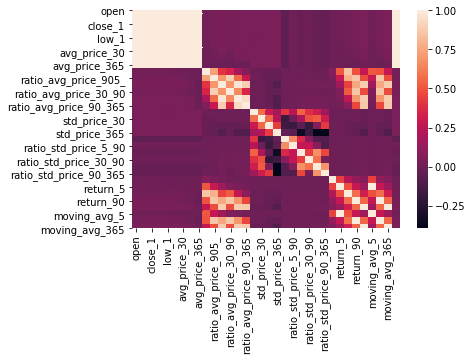

In [51]:
sns.heatmap(data.corr())

NameError: name 'data_train' is not defined

In [53]:
x = data.iloc[:,:-1]
x

,open,open_1,close_1,high_1,low_1,avg_price_5,avg_price_30,avg_price_90,avg_price_365,ratio_avg_price_5_30,...,ratio_std_price_30_365,ratio_std_price_90_365,return_1,return_5,return_30,return_90,return_365,moving_avg_5,moving_avg_30,moving_avg_365
253,1.43335,1.43335,1.43335,1.43335,1.43335,1.43335,1.43335,1.433350,1.433240,1.0,...,7.280301e-07,0.000002,0.0,0.0,0.0,0.000000,0.000293,4.065758e-21,0.000000,0.000001
254,1.43335,1.43335,1.43335,1.43335,1.43335,1.43335,1.43335,1.433350,1.433243,1.0,...,7.338196e-07,0.000002,0.0,0.0,0.0,0.000000,0.000419,4.065758e-21,0.000000,0.000002
255,1.43335,1.43335,1.43335,1.43335,1.43335,1.43335,1.43335,1.433350,1.433245,1.0,...,7.383712e-07,0.000002,0.0,0.0,0.0,0.000000,0.000377,4.065758e-21,0.000000,0.000002
256,1.43335,1.43335,1.43335,1.43335,1.43335,1.43335,1.43335,1.433350,1.433247,1.0,...,7.442955e-07,0.000002,0.0,0.0,0.0,0.000000,0.000412,4.065758e-21,0.000000,0.000002
257,1.43335,1.43335,1.43335,1.43335,1.43335,1.43335,1.43335,1.433350,1.433249,1.0,...,7.489419e-07,0.000002,0.0,0.0,0.0,0.000000,0.000370,4.065758e-21,0.000000,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245397,1.05150,1.05150,1.05150,1.05150,1.05150,1.05150,1.05150,1.051561,1.050044,1.0,...,0.000000e+00,0.072206,0.0,0.0,0.0,-0.001415,0.009980,0.000000e+00,-0.000022,0.000040
245398,1.05150,1.05150,1.05150,1.05150,1.05150,1.05150,1.05150,1.051528,1.050084,1.0,...,0.000000e+00,0.033624,0.0,0.0,0.0,-0.002003,0.009747,0.000000e+00,-0.000032,0.000039
245399,1.05150,1.05150,1.05150,1.05150,1.05150,1.05150,1.05150,1.051512,1.050124,1.0,...,0.000000e+00,0.015858,0.0,0.0,0.0,-0.000922,0.009631,0.000000e+00,-0.000015,0.000038
245400,1.05150,1.05150,1.05150,1.05150,1.05150,1.05150,1.05150,1.051507,1.050165,1.0,...,0.000000e+00,0.013077,0.0,0.0,0.0,-0.000285,0.009970,0.000000e+00,-0.000005,0.000040


In [54]:
y = data.iloc[:,-1]
y

253       1.43335
254       1.43335
255       1.43335
256       1.43335
257       1.43335
           ...   
245397    1.05150
245398    1.05150
245399    1.05150
245400    1.05150
245401    1.05150
Name: close, Length: 207610, dtype: float64

In [57]:
data.isna().sum()

open                      0
open_1                    0
close_1                   0
high_1                    0
low_1                     0
avg_price_5               0
avg_price_30              0
avg_price_90              0
avg_price_365             0
ratio_avg_price_5_30      0
ratio_avg_price_905_      0
ratio_avg_price_5_365     0
ratio_avg_price_30_90     0
ratio_avg_price_30_365    0
ratio_avg_price_90_365    0
std_price_5               0
std_price_30              0
std_price_90              0
std_price_365             0
ratio_std_price_5_30      0
ratio_std_price_5_90      0
ratio_std_price_5_365     0
ratio_std_price_30_90     0
ratio_std_price_30_365    0
ratio_std_price_90_365    0
return_1                  0
return_5                  0
return_30                 0
return_90                 0
return_365                0
moving_avg_5              0
moving_avg_30             0
moving_avg_365            0
close                     0
dtype: int64

In [55]:
from sklearn.model_selection import train_test_split
x_train ,x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 ,random_state=0)

In [61]:
#initiating standard scaler
scaler = StandardScaler()

#fit the scaler in training features
scaler.fit(x_train)

#Rescale both sets using the trained scaler
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

ValueError: Input contains infinity or a value too large for dtype('float64').

In [56]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

lin.fit(x_train, y_train)
predictions_lin = lin.predict(x_test)

print('RMSE: {0:.3f}'.format(mean_squared_error(y_test, predictions_lin)**0.5))
print('MAE: {0:.3f}'.format(mean_absolute_error(y_test, predictions_lin)))
print('R^2: {0:.3f}'.format(r2_score(y_test, predictions_lin)))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## New way to generate time serias prediction

In [27]:
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)
df.head()

,Open,High,Low,Close,Volume
Time,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8


In [28]:
df['time_values'] = df.index.values
df.head()

,Open,High,Low,Close,Volume,time_values
Time,,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1,2010-01-01 00:00:00
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2,2010-01-01 00:15:00
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2,2010-01-01 00:30:00
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3,2010-01-01 00:45:00
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8,2010-01-01 01:00:00


In [29]:
df['days'] = df.time_values.apply(lambda x: x.day)
df.head()

,Open,High,Low,Close,Volume,time_values,days
Time,,,,,,,
2010-01-01 00:00:00,1.43283,1.43293,1.43224,1.43293,608600007.1,2010-01-01 00:00:00,1
2010-01-01 00:15:00,1.43285,1.43295,1.43229,1.43275,535600003.2,2010-01-01 00:15:00,1
2010-01-01 00:30:00,1.43280,1.43303,1.43239,1.43281,436299999.2,2010-01-01 00:30:00,1
2010-01-01 00:45:00,1.43285,1.43294,1.43229,1.43276,614299997.3,2010-01-01 00:45:00,1
2010-01-01 01:00:00,1.43287,1.43292,1.43206,1.43282,705300008.8,2010-01-01 01:00:00,1


In [30]:
# test average prediction
df['avg'] = (df['High'] + df['Low'])/2
df['mov'] = df['Close'] - df['Open']

def trans(x):
    if x >=0 :
        return True
    else:
        return False
df['mov'] = df['mov'].apply(trans)

pred_col = 'avg'
df = df[[pred_col]]

df.head()

,avg
Time,
2010-01-01 00:00:00,1.432585
2010-01-01 00:15:00,1.432620
2010-01-01 00:30:00,1.432710
2010-01-01 00:45:00,1.432615
2010-01-01 01:00:00,1.432490


### How many reads we have per day ?

In [31]:
day_reads = len(df['2011-1-1'])
day_reads

96

### that's what we aiming for

In [32]:
forecast_out = day_reads*7 # predicting 1 week into future
df['Prediction'] = df[[pred_col]].shift(-forecast_out)

In [33]:
df.tail()

,avg,Prediction
Time,,
2016-12-31 22:45:00,1.0515,NaN
2016-12-31 23:00:00,1.0515,NaN
2016-12-31 23:15:00,1.0515,NaN
2016-12-31 23:30:00,1.0515,NaN
2016-12-31 23:45:00,1.0515,NaN


In [34]:
X = np.array(df.drop('Prediction', 1))

In [35]:
X_forecast = X[-forecast_out:] # set X_forecast equal to last forecast values
y_forecast = np.array(df[pred_col])[-forecast_out:]
X = X[:-forecast_out] # remove last forecast values from X

In [36]:
y = np.array(df['Prediction'])
y = y[:-forecast_out]

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [38]:
# Training
clf = LinearRegression()
clf.fit(X_train,y_train)
# Testing
confidence = clf.score(X_test, y_test)
print("confidence: ", confidence)

confidence:  0.97745108668621


In [39]:
forecast_prediction = clf.predict(X_test)


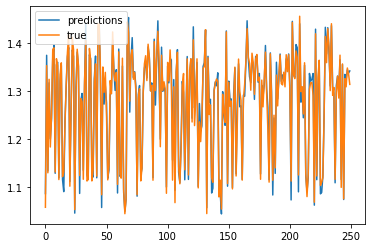

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
size = 250
plt.plot(forecast_prediction[:size], label='predictions');
plt.plot(y_test[:size], label='true');
plt.legend()
plt.show();